In [1]:
import pandas as pd
import numpy as np
import nltk
import re
import matplotlib.pyplot as plt
import seaborn as sb
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [2]:
data= pd.read_csv("train.csv",encoding="latin-1")

In [3]:
data.head()


,ItemID,label,tweet
0,1,0,is so sad for my APL frie...
1,2,0,I missed the New Moon trail...
2,3,1,omg its already 7:30 :O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,i think mi bf is cheating on me!!! ...


In [4]:
data.shape

(99989, 3)

In [5]:
data.drop_duplicates(inplace=True)

In [6]:
data.shape

(99989, 3)

In [7]:
data.drop(columns=['ItemID'],axis=1,inplace=True)
data.head()


,label,tweet
0,0,is so sad for my APL frie...
1,0,I missed the New Moon trail...
2,1,omg its already 7:30 :O
3,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,0,i think mi bf is cheating on me!!! ...


In [8]:
#check the class  distribution
data["label"].value_counts()

1    56457
0    43532
Name: label, dtype: int64

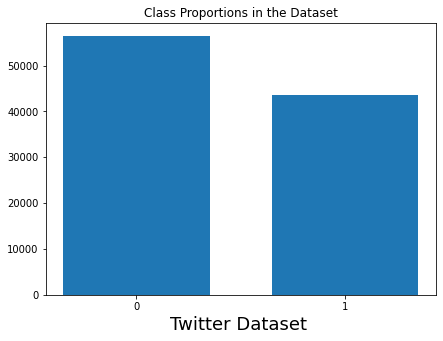

In [9]:
plt.figure(figsize=(7,5))
plt.bar(['0','1'],data["label"].value_counts(),width=0.7)
plt.title("Class Proportions in the Dataset")
plt.xlabel("Twitter Dataset ",fontsize=18)
plt.show()

In [10]:
#lowering the text
data["tweet"]=data["tweet"].apply(lambda x: x.lower())

In [11]:
data.head(10)

,label,tweet
0,0,is so sad for my apl frie...
1,0,i missed the new moon trail...
2,1,omg its already 7:30 :o
3,0,.. omgaga. im sooo im gunna cry. i'...
4,0,i think mi bf is cheating on me!!! ...
5,0,or i just worry too much?
6,1,juuuuuuuuuuuuuuuuussssst chillin!!
7,0,sunny again work tomorrow :-| ...
8,1,handed in my uniform today . i miss you ...
9,1,hmmmm.... i wonder how she my number @-)


In [12]:
#cleaning the text
data["tweet"]=data.tweet.str.replace('[^a-zA-Z ]', '')

In [13]:
#Code for removing slang words
d ={"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have"}
words = "I luv kashmir"
words = words.split()
reformed = [d[word] if word in d else word for word in words]
reformed = " ".join(reformed)

In [14]:
reformed

'I luv kashmir'

In [15]:
#removing slang words
data['tweet'] = data['tweet'].apply(lambda x : ' '.join(d[word] if word in d else word for word in x.split()))

In [16]:
#Removing stopwords
#data['tweet'] = data['tweet'].apply(lambda x : ' '.join([word for word in x.split() if not word in set(stopwords.words('english'))]))

In [17]:
data.head()

,label,tweet
0,0,is so sad for my apl friend
1,0,i missed the new moon trailer
2,1,omg its already o
3,0,omgaga im sooo im gunna cry ive been at this d...
4,0,i think mi bf is cheating on me tt


In [18]:
#Stemming
ps = PorterStemmer()
data['tweet'] = data['tweet'].apply(lambda x : ' '.join([ps.stem(word) for word in x.split()]))

In [19]:
data.head()

,label,tweet
0,0,is so sad for my apl friend
1,0,i miss the new moon trailer
2,1,omg it alreadi o
3,0,omgaga im sooo im gunna cri ive been at thi de...
4,0,i think mi bf is cheat on me tt


In [20]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Bidirectional,SimpleRNN
from tensorflow.keras.layers import Dense
from keras.layers import Dropout
import tensorflow as tf
from tensorflow.keras import regularizers
from tensorflow.keras import regularizers


In [21]:
#Converting words into one hot representation
voc_size=13884
from tensorflow.keras.preprocessing.text import one_hot
onehot_repr=[one_hot(words,voc_size)for words in data["tweet"]] 
onehot_repr

[[10124, 8524, 3784, 2613, 5484, 8402, 6512],
 [13867, 4461, 12876, 1837, 12581, 458],
 [5679, 3074, 3582, 3158],
 [13580,
  13662,
  2668,
  13662,
  4572,
  10229,
  4036,
  6617,
  11793,
  11073,
  11272,
  2731,
  13867,
  4432,
  12979,
  12013,
  11128,
  2738,
  13001,
  890,
  7926,
  142],
 [13867, 11839, 12327, 9381, 10124, 12438, 7926, 11496, 844],
 [4086, 13867, 12013, 4954, 7911, 2055],
 [7338, 12502],
 [2392, 1716, 1331, 5274, 41, 3112],
 [11468, 83, 5484, 13457, 4589, 13867, 4461, 8634, 3582],
 [1525, 13867, 11867, 3179, 1993, 5484, 11742],
 [13867, 3190, 11839, 6408, 11958],
 [7594, 4304, 8281, 12876, 2386, 4393, 83, 5484, 7739, 8281, 5207],
 [11073, 4798, 10479, 4234, 8524, 4178],
 [3303, 6748, 12889, 83, 10069, 5356, 11819],
 [3493, 9306, 3074, 8634, 3491],
 [4361, 11073, 10124, 12876, 2743, 13867, 413, 926, 12872],
 [333,
  13201,
  13662,
  12779,
  6743,
  10011,
  12872,
  8941,
  8281,
  13867,
  1670,
  52,
  10124,
  10856,
  3808],
 [413,
  10471,
  9888,
  1

In [22]:
#Embedding the sentences
sent_length=40
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[    0     0     0 ...  5484  8402  6512]
 [    0     0     0 ...  1837 12581   458]
 [    0     0     0 ...  3074  3582  3158]
 ...
 [    0     0     0 ... 13867  5659  8524]
 [    0     0     0 ... 10745 10679 11496]
 [    0     0     0 ...  9163  8634    52]]


In [23]:
#Creating the model
embedding_vector_features=80
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length,embeddings_regularizer=regularizers.l2(0.001)))
model.add(SimpleRNN(128,kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.2))
model.add(Dense(1,activation="sigmoid"))
model.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(lr=0.0001),metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 40, 80)            1110720   
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 128)               26752     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 1,137,601
Trainable params: 1,137,601
Non-trainable params: 0
_________________________________________________________________
None


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [24]:
import numpy as np
X_final=np.array(embedded_docs)
y_final=np.array(data["label"])

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.15, random_state=64)

In [26]:
###Training the model
a1=model.fit(X_train,y_train,epochs=6,batch_size=64,validation_split=0.1,shuffle=True )

Epoch 1/6
1196/1196 [==============================] - 83s 66ms/step - loss: 0.9187 - accuracy: 0.6495 - val_loss: 0.6702 - val_accuracy: 0.7382
Epoch 2/6
1196/1196 [==============================] - 83s 69ms/step - loss: 0.6225 - accuracy: 0.7583 - val_loss: 0.6179 - val_accuracy: 0.7460
Epoch 3/6
1196/1196 [==============================] - 82s 69ms/step - loss: 0.5748 - accuracy: 0.7797 - val_loss: 0.6001 - val_accuracy: 0.7593
Epoch 4/6
1196/1196 [==============================] - 83s 69ms/step - loss: 0.5452 - accuracy: 0.7947 - val_loss: 0.6083 - val_accuracy: 0.7504
Epoch 5/6
1196/1196 [==============================] - 85s 71ms/step - loss: 0.5072 - accuracy: 0.8203 - val_loss: 0.6439 - val_accuracy: 0.7416
Epoch 6/6
1196/1196 [==============================] - 85s 71ms/step - loss: 0.4381 - accuracy: 0.8608 - val_loss: 0.7123 - val_accuracy: 0.7373


In [29]:
y_pred=(model.predict(X_test) > 0.5).astype("int32")

In [30]:
from sklearn.metrics import confusion_matrix
con=confusion_matrix(y_test,y_pred)

In [31]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test,y_pred)
acc

0.7394492966197747

In [32]:
a1.history

{'accuracy': [0.6495404839515686,
  0.7582852840423584,
  0.7797257304191589,
  0.7947471141815186,
  0.820292592048645,
  0.8608071804046631],
 'loss': [0.9186740517616272,
  0.6224751472473145,
  0.5747592449188232,
  0.5452437996864319,
  0.507166862487793,
  0.4380699694156647],
 'val_accuracy': [0.7382044792175293,
  0.7459701299667358,
  0.7592657804489136,
  0.7504412531852722,
  0.7416166663169861,
  0.7372632026672363],
 'val_loss': [0.6702325344085693,
  0.6178846955299377,
  0.6000841856002808,
  0.6083022952079773,
  0.6438801288604736,
  0.7122804522514343]}

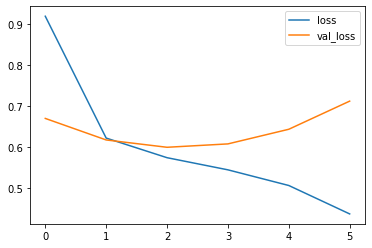

In [33]:
# Evaluating the model
# plotting the loss and validation loss of the model
plt.plot(a1.history['loss'], label='loss')
plt.plot(a1.history['val_loss'], label = 'val_loss')
plt.legend()


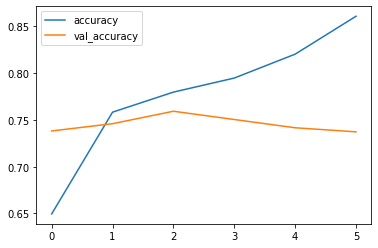

In [34]:
# plotting the accuracy and validation accuracy of the model
plt.plot(a1.history['accuracy'], label= 'accuracy')
plt.plot(a1.history['val_accuracy'], label='val_accuracy')
plt.legend()


In [35]:
#Creating the model
embedding_vector_features=80
model1=Sequential()
model1.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length,embeddings_regularizer=regularizers.l2(0.001)))
model1.add(LSTM(100,kernel_regularizer=regularizers.l2(0.001)))
model1.add(Dense(64,activation="relu"))
model1.add(Dropout(0.2))
model1.add(Dense(32,activation="relu"))
model1.add(Dense(1,activation="sigmoid"))
model1.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(0.0001),metrics=['accuracy'])
print(model1.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 40, 80)            1110720   
_________________________________________________________________
lstm (LSTM)                  (None, 100)               72400     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                6464      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 1,191,697
Trainable params: 1,191,697
Non-trainable params: 0
____________________________________________

In [36]:
import numpy as np
X_final=np.array(embedded_docs)
y_final=np.array(data["label"])

In [37]:
X_final.shape,y_final.shape

((99989, 40), (99989,))

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.15, random_state=64)

In [39]:
###Training the model
a=model1.fit(X_train,y_train,epochs=3,batch_size=64,validation_split=0.1,shuffle=True )

Epoch 1/3
1196/1196 [==============================] - 24s 16ms/step - loss: 0.7827 - accuracy: 0.6525 - val_loss: 0.5546 - val_accuracy: 0.7406
Epoch 2/3
1196/1196 [==============================] - 19s 16ms/step - loss: 0.5309 - accuracy: 0.7610 - val_loss: 0.5311 - val_accuracy: 0.7611
Epoch 3/3
1196/1196 [==============================] - 18s 15ms/step - loss: 0.5087 - accuracy: 0.7780 - val_loss: 0.5691 - val_accuracy: 0.7461


In [40]:
y_pred=(model1.predict(X_test) > 0.5).astype("int32")

In [41]:
from sklearn.metrics import confusion_matrix
con1=confusion_matrix(y_test,y_pred)

In [42]:
from sklearn.metrics import accuracy_score
acc1=accuracy_score(y_test,y_pred)
acc1

0.7503166877791853

In [43]:
a.history

{'accuracy': [0.6524950861930847, 0.7610307335853577, 0.7779869437217712],
 'loss': [0.7827069759368896, 0.5309291481971741, 0.5086556673049927],
 'val_accuracy': [0.7405577301979065, 0.7611483931541443, 0.7460877895355225],
 'val_loss': [0.5545637607574463, 0.5311476588249207, 0.5691208243370056]}

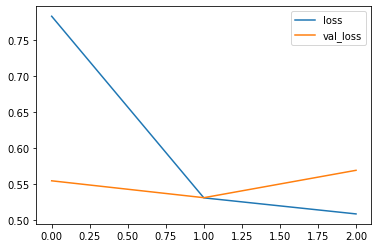

In [44]:
# Evaluating the model
# plotting the loss and validation loss of the model
plt.plot(a.history['loss'], label='loss')
plt.plot(a.history['val_loss'], label = 'val_loss')
plt.legend()


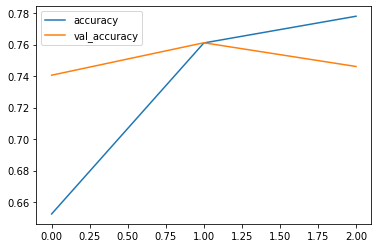

In [45]:
# plotting the accuracy and validation accuracy of the model
plt.plot(a.history['accuracy'], label= 'accuracy')
plt.plot(a.history['val_accuracy'], label='val_accuracy')
plt.legend()


In [46]:
import keras
embedding_vector_features=40
model2=Sequential()
model2.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length,embeddings_regularizer=regularizers.l2(0.001)))
model2.add(LSTM(256,return_sequences=True))
model2.add(LSTM(128,return_sequences=True))
model2.add(Dropout(0.1))
model2.add(LSTM(64))
model2.add(Dropout(0.2))
model2.add(Dense(32,activation="relu",kernel_regularizer=regularizers.l2(0.001)))
model2.add(Dropout(0.3))
model2.add(Dense(1,activation='sigmoid'))
model2.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(0.0001),metrics=['accuracy'])
print(model2.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 40, 40)            555360    
_________________________________________________________________
lstm_1 (LSTM)                (None, 40, 256)           304128    
_________________________________________________________________
lstm_2 (LSTM)                (None, 40, 128)           197120    
_________________________________________________________________
dropout_2 (Dropout)          (None, 40, 128)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)               

In [47]:
import numpy as np
X_final=np.array(embedded_docs)
y_final=np.array(data["label"])

In [48]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.15, random_state=64)


In [49]:
###Training the model
b=model2.fit(X_train,y_train,epochs=4,batch_size=32,validation_split=0.1,shuffle=True)

Epoch 1/4
2391/2391 [==============================] - 108s 43ms/step - loss: 0.6491 - accuracy: 0.6804 - val_loss: 0.5359 - val_accuracy: 0.7550
Epoch 2/4
2391/2391 [==============================] - 100s 42ms/step - loss: 0.5211 - accuracy: 0.7681 - val_loss: 0.5249 - val_accuracy: 0.7613
Epoch 3/4
2391/2391 [==============================] - 98s 41ms/step - loss: 0.4976 - accuracy: 0.7818 - val_loss: 0.5296 - val_accuracy: 0.7588
Epoch 4/4
2391/2391 [==============================] - 100s 42ms/step - loss: 0.4818 - accuracy: 0.7901 - val_loss: 0.5247 - val_accuracy: 0.7602


In [50]:
y_pred=(model2.predict(X_test) > 0.5).astype("int32")

In [51]:
from sklearn.metrics import confusion_matrix
con2=confusion_matrix(y_test,y_pred)

In [52]:
from sklearn.metrics import accuracy_score
acc2=accuracy_score(y_test,y_pred)

acc2

0.7607840522701513

In [53]:
b.history

{'accuracy': [0.6803937554359436,
  0.7680642008781433,
  0.7818174958229065,
  0.7901191115379333],
 'loss': [0.6490570306777954,
  0.5210822820663452,
  0.4976126253604889,
  0.48182594776153564],
 'val_accuracy': [0.7550299763679504,
  0.7612660527229309,
  0.7587951421737671,
  0.7602070569992065],
 'val_loss': [0.5359301567077637,
  0.524940550327301,
  0.5295926928520203,
  0.5247393250465393]}

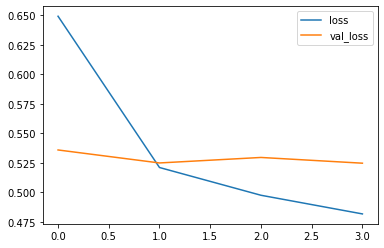

In [54]:
# Evaluating the model
# plotting the loss and validation loss of the model
plt.plot(b.history['loss'], label='loss')
plt.plot(b.history['val_loss'], label = 'val_loss')
plt.legend()


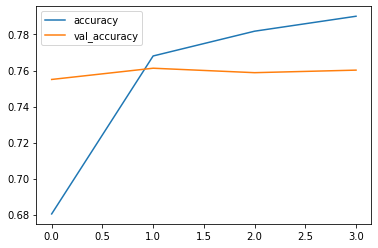

In [55]:
# plotting the accuracy and validation accuracy of the model
plt.plot(b.history['accuracy'], label= 'accuracy')
plt.plot(b.history['val_accuracy'], label='val_accuracy')
plt.legend()

In [56]:

#Creating the model
embedding_vector_features=40
model3=Sequential()
model3.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length,embeddings_regularizer=regularizers.l2(0.001)))
model3.add(Bidirectional(LSTM(64,kernel_regularizer=regularizers.l2(0.001))))
model3.add(Dropout(0.1))
model3.add(Dense(32,activation="relu",kernel_regularizer=regularizers.l2(0.001)))
model3.add(Dropout(0.2))
model3.add(Dense(1,activation="sigmoid"))
model3.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(0.0001),metrics=['accuracy'])
print(model3.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 40, 40)            555360    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               53760     
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 32)                4128      
_________________________________________________________________
dropout_6 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 33        
Total params: 613,281
Trainable params: 613,281
Non-trainable params: 0
________________________________________________

In [57]:
import numpy as np
X_final=np.array(embedded_docs)
y_final=np.array(data["label"])

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.15, random_state=64)

In [59]:
###Training the model
c=model3.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=32,validation_split=0.1,shuffle=True)

Epoch 1/10
2391/2391 [==============================] - 59s 23ms/step - loss: 0.6993 - accuracy: 0.6621 - val_loss: 0.5730 - val_accuracy: 0.7306
Epoch 2/10
2391/2391 [==============================] - 53s 22ms/step - loss: 0.5444 - accuracy: 0.7586 - val_loss: 0.5419 - val_accuracy: 0.7555
Epoch 3/10
2391/2391 [==============================] - 55s 23ms/step - loss: 0.5166 - accuracy: 0.7759 - val_loss: 0.5365 - val_accuracy: 0.7534
Epoch 4/10
2391/2391 [==============================] - 56s 23ms/step - loss: 0.5017 - accuracy: 0.7832 - val_loss: 0.5314 - val_accuracy: 0.7559
Epoch 5/10
2391/2391 [==============================] - 56s 23ms/step - loss: 0.4909 - accuracy: 0.7896 - val_loss: 0.5303 - val_accuracy: 0.7602
Epoch 6/10
2391/2391 [==============================] - 55s 23ms/step - loss: 0.4824 - accuracy: 0.7940 - val_loss: 0.5455 - val_accuracy: 0.7355
Epoch 7/10
2391/2391 [==============================] - 54s 23ms/step - loss: 0.4750 - accuracy: 0.7973 - val_loss: 0.5322 -

In [60]:
 y_pred=(model3.predict(X_test) > 0.5).astype("int32")

In [61]:
from sklearn.metrics import confusion_matrix
con3=confusion_matrix(y_test,y_pred)

In [62]:
from sklearn.metrics import accuracy_score
acc3=accuracy_score(y_test,y_pred)
acc3


0.7542502833522234

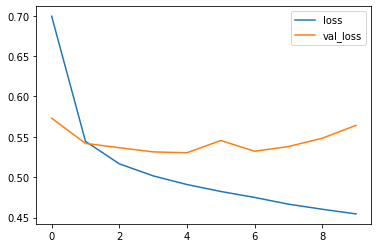

In [63]:
# Evaluating the model
# plotting the loss and validation loss of the model
plt.plot(c.history['loss'], label='loss')
plt.plot(c.history['val_loss'], label = 'val_loss')
plt.legend()


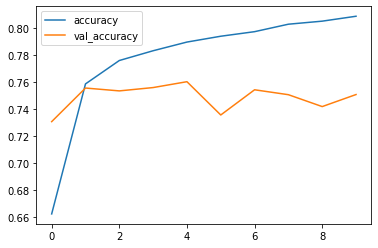

In [64]:
# plotting the accuracy and validation accuracy of the model
plt.plot(c.history['accuracy'], label= 'accuracy')
plt.plot(c.history['val_accuracy'], label='val_accuracy')
plt.legend()
